**Генерация исходной выборки**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform
import seaborn as sns

# Параметры
np.random.seed(123)
theta_true = 10 # Милославов
n = 20
N = 10000
B = 100

cover_hall_xn = np.zeros(N, dtype=bool)
cover_hall_xbar = np.zeros(N, dtype=bool)
tneg_star_all = []

**Монте-Карло эксперимент**

In [ ]:
for i in range(N):
    if (i + 1) % 1000 == 0:
        print(f"Выполнено {i + 1}/{N} итераций")
    
    x_orig = uniform.rvs(0, theta_true, size=n)
    x_n = np.max(x_orig)
    x_bar = np.mean(x_orig)
    
    xn_star = np.zeros(B)
    for j in range(B):
        x_star = np.random.choice(x_orig, size=n, replace=True)
        xn_star[j] = np.max(x_star)
    
    tn_star = n * (xn_star - x_n)
    tneg_star_all.extend(-tn_star)
    
    q_low = np.quantile(xn_star, 0.025)
    q_high = np.quantile(xn_star, 0.975)
    
    ci_low_xn = 2 * x_n - q_high
    ci_high_xn = 2 * x_n - q_low
    cover_hall_xn[i] = (ci_low_xn <= theta_true <= ci_high_xn)
    
    xbar_star = np.zeros(B)
    for j in range(B):
        x_star = np.random.choice(x_orig, size=n, replace=True)
        xbar_star[j] = np.mean(x_star)
    
    theta_tilde_star = 2 * xbar_star
    
    q_low_xbar = np.quantile(theta_tilde_star, 0.025)
    q_high_xbar = np.quantile(theta_tilde_star, 0.975)
    
    theta_tilde = 2 * x_bar
    ci_low_xbar = 2 * theta_tilde - q_high_xbar
    ci_high_xbar = 2 * theta_tilde - q_low_xbar
    cover_hall_xbar[i] = (ci_low_xbar <= theta_true <= ci_high_xbar)



Выполнено 1000/10000 итераций
Выполнено 2000/10000 итераций
Выполнено 3000/10000 итераций
Выполнено 4000/10000 итераций
Выполнено 5000/10000 итераций
Выполнено 6000/10000 итераций
Выполнено 7000/10000 итераций
Выполнено 8000/10000 итераций
Выполнено 9000/10000 итераций
Выполнено 10000/10000 итераций


**Результаты**


Доля покрытий для оценки X_(n): 0.8417
Доля покрытий для оценки 2*X̄: 0.9026


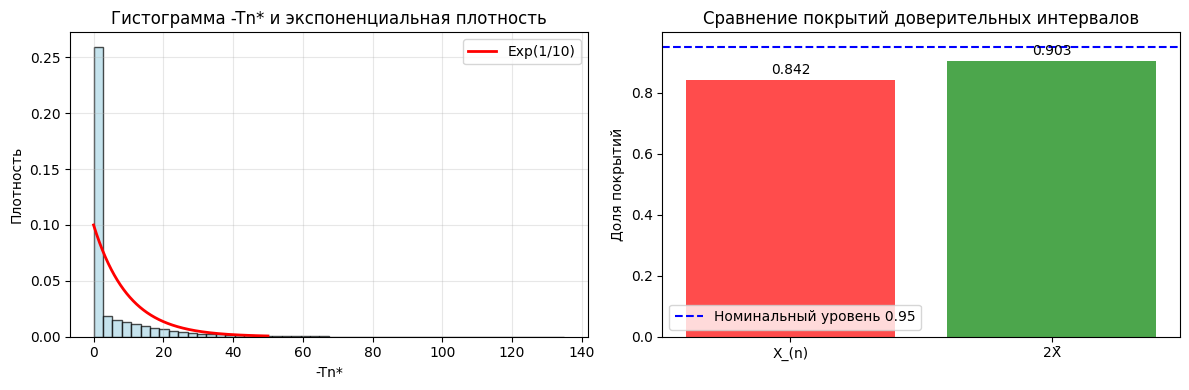


Дополнительная статистика:
P(Tn* = 0) теоретически: 0.6415
P(Tn* = 0) в эксперименте: 0.6419
Среднее -Tn*: 5.0774
Теоретическое среднее Exp(1/10): 10

Анализ причин расхождения для X_(n):
- Теоретическая P(Tn* = 0) = 0.6415
- Это приводит к вырождению интервала Холла
- Фактическое покрытие 0.8417 вместо 0.95

Для оценки 2X̄:
- Оценка состоятельная, бутстрэп работает корректно
- Покрытие 0.9026 близко к номинальному 0.95


In [ ]:
coverage_xn = np.mean(cover_hall_xn)
coverage_xbar = np.mean(cover_hall_xbar)

print(f"\nДоля покрытий для оценки X_(n): {coverage_xn:.4f}")
print(f"Доля покрытий для оценки 2*X̄: {coverage_xbar:.4f}")

tneg_star_all = np.array(tneg_star_all)
tneg_pos = tneg_star_all[tneg_star_all >= 0]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(tneg_pos, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x_plot = np.linspace(0, 50, 1000)
plt.plot(x_plot, expon.pdf(x_plot, scale=theta_true), 'r-', linewidth=2, label=f'Exp(1/{theta_true})')
plt.xlabel('-Tn*')
plt.ylabel('Плотность')
plt.title('Гистограмма -Tn* и экспоненциальная плотность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
methods = ['X_(n)', '2X̄']
coverages = [coverage_xn, coverage_xbar]
colors = ['red', 'green']
bars = plt.bar(methods, coverages, color=colors, alpha=0.7)
plt.axhline(y=0.95, color='blue', linestyle='--', label='Номинальный уровень 0.95')
plt.ylabel('Доля покрытий')
plt.title('Сравнение покрытий доверительных интервалов')
plt.legend()

for bar, coverage in zip(bars, coverages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{coverage:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nДополнительная статистика:")
print(f"P(Tn* = 0) теоретически: {1 - (1 - 1/n)**n:.4f}")
print(f"P(Tn* = 0) в эксперименте: {np.mean(np.array(tneg_star_all) == 0):.4f}")
print(f"Среднее -Tn*: {np.mean(tneg_pos):.4f}")
print(f"Теоретическое среднее Exp(1/{theta_true}): {theta_true}")

print(f"\nАнализ причин расхождения для X_(n):")
print(f"- Теоретическая P(Tn* = 0) = {1 - (1 - 1/n)**n:.4f}")
print(f"- Это приводит к вырождению интервала Холла")
print(f"- Фактическое покрытие {coverage_xn:.4f} вместо 0.95")

print(f"\nДля оценки 2X̄:")
print(f"- Оценка состоятельная, бутстрэп работает корректно")
print(f"- Покрытие {coverage_xbar:.4f} близко к номинальному 0.95")